In [918]:
import sys, os
sys.path.append(os.path.abspath("modules"))
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
from scipy import stats
from highlight_text.htext import htext, fig_htext

plt.style.use("football")

%matplotlib inline

pd.options.display.max_columns = None

In [6]:
data_dir = "data/fbref"

In [8]:
df = pd.read_csv(data_dir + "/fbrefEurope.csv")

In [12]:
df.columns.to_list()

['Player',
 'League',
 'Player.1',
 'Nation',
 'Pos',
 'Squad',
 'Age',
 '90s',
 'Total: Cmp',
 'Total: Att',
 'Total: Cmp%',
 'Total: TotDist',
 'Total: PrgDist',
 'Short: Cmp',
 'Short: Att',
 'Short: Cmp%',
 'Medium: Cmp',
 'Medium: Att',
 'Medium: Cmp%',
 'Long: Cmp',
 'Long: Att',
 'Long: Cmp%',
 'Ast',
 'xA',
 'A-xA',
 'KP',
 '1/3',
 'PPA',
 'CrsPA',
 'Prog',
 'Standard: Gls',
 'Standard: PK',
 'Standard: PKatt',
 'Standard: Sh',
 'Standard: SoT',
 'Standard: FK',
 'Standard: SoT%',
 'Standard: Sh/90',
 'Standard: SoT/90',
 'Standard: G/Sh',
 'Standard: G/SoT',
 'Expected: xG',
 'Expected: npxG',
 'Expected: npxG/Sh',
 'Expected: G-xG',
 'Expected: np:G-xG',
 'Performance: CrdY',
 'Performance: CrdR',
 'Performance: 2CrdY',
 'Performance: Fls',
 'Performance: Fld',
 'Performance: Off',
 'Performance: Crs',
 'Performance: Int',
 'Performance: TklW',
 'Performance: PKwon',
 'Performance: PKcon',
 'Performance: OG',
 'Performance: Recov',
 'Aerial Duels: Won',
 'Aerial Duels: Lost',

In [ ]:
cols = ['Expected: npxG','Standard: Sh','Touches: Att Pen','shot touch %','xA','Pressures: Succ','Pressures: Press','Aerial Duels: Won','Dribbles: Succ','npxG/shot']

In [973]:
def prepare_data(df, cols, league=None, year=None, nineties=None):
    df_fw = df[['Player','League','year','Pos','Squad','Age','90s','Expected: npxG','Standard: Sh','Touches: Att Pen','Touches: Live','xA','Pressures: Succ','Pressures: Press','Aerial Duels: Won','Dribbles: Succ']].copy()
    df_fw = df_fw[df_fw['Pos'].notna()]
    df_fw = df_fw[df_fw['Pos'].str.startswith('FW')]
    if league:
        df_fw = df_fw[df_fw['League'] == league]
    if year:
        df_fw = df_fw[df_fw['year'] == year]
    if nineties:
        df_fw = df_fw[df_fw['90s'] >= nineties]
    df_fw['shot touch %'] = df_fw['Standard: Sh']/df_fw['Touches: Live']
    df_fw['npxG/shot'] = df_fw['Expected: npxG']/df_fw['Standard: Sh']
    
    df_fw_norm = df_fw.copy()
    df_fw_norm[cols] = df_fw[cols].div(df_fw.max()[cols])
    
    return df_fw, df_fw_norm

In [974]:
test1, test2 = prepare_data(df,cols,league='Premier-League',year='2019-2020',nineties=10)

In [980]:
test1[(test1['Player'] == 'Tammy Abraham')]

,Player,League,year,Pos,Squad,Age,90s,Expected: npxG,Standard: Sh,Touches: Att Pen,Touches: Live,xA,Pressures: Succ,Pressures: Press,Aerial Duels: Won,Dribbles: Succ,shot touch %,npxG/shot
7285,Tammy Abraham,Premier-League,2019-2020,FW,Chelsea,21.0,21.6,12.3,74.0,141.0,604.0,2.3,112.0,383.0,57.0,19.0,0.122517,0.166216


In [944]:
df_fw = df[['Player','League','year','Pos','Squad','Age','90s','Expected: npxG','Standard: Sh','Touches: Att Pen','Touches: Live','xA','Pressures: Succ','Pressures: Press','Aerial Duels: Won','Dribbles: Succ']].copy()

In [945]:
df_fw = df_fw[df_fw['Pos'].notna()]

In [946]:
#df_fw = df_fw[df_fw['Pos'].str.contains('FW')]

In [947]:
df_fw = df_fw[df_fw['Pos'].str.startswith('FW')]

In [948]:
df_fw[df_fw['League'] == 'Premier-League']

,Player,League,year,Pos,Squad,Age,90s,Expected: npxG,Standard: Sh,Touches: Att Pen,Touches: Live,xA,Pressures: Succ,Pressures: Press,Aerial Duels: Won,Dribbles: Succ
1,Rolando Aarons,Premier-League,2017-2018,"FW,MF",Newcastle Utd,21.0,1.5,0.1,2.0,3.0,68.0,0.0,8.0,34.0,2.0,2.0
2,Tammy Abraham,Premier-League,2017-2018,"FW,MF",Swansea City,19.0,19.2,6.4,43.0,72.0,516.0,0.8,58.0,178.0,30.0,26.0
6,Benik Afobe,Premier-League,2017-2018,"FW,MF",Bournemouth,24.0,6.8,1.5,8.0,28.0,217.0,0.1,33.0,112.0,17.0,4.0
7,Sergio Agüero,Premier-League,2017-2018,FW,Manchester City,29.0,21.8,13.7,92.0,178.0,899.0,6.4,70.0,262.0,6.0,31.0
17,Nordin Amrabat,Premier-League,2017-2018,FW,Watford,30.0,2.2,0.0,1.0,5.0,101.0,0.1,16.0,41.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7763,Connor Wickham,Premier-League,2019-2020,"FW,MF",Crystal Palace,26.0,1.1,1.4,4.0,7.0,60.0,0.6,10.0,28.0,10.0,2.0
7767,Willian,Premier-League,2019-2020,FW,Chelsea,30.0,22.4,3.1,55.0,107.0,1395.0,4.9,132.0,446.0,8.0,52.0
7770,Callum Wilson,Premier-League,2019-2020,FW,Bournemouth,27.0,27.1,9.2,43.0,140.0,697.0,2.2,170.0,651.0,35.0,22.0
7773,Chris Wood,Premier-League,2019-2020,FW,Burnley,27.0,22.9,10.0,53.0,86.0,639.0,0.8,83.0,371.0,98.0,9.0


In [949]:
df_fw['shot touch %'] = df_fw['Standard: Sh']/df_fw['Touches: Live']

In [950]:
df_fw['npxG/shot'] = df_fw['Expected: npxG']/df_fw['Standard: Sh']

In [951]:
df_fw.head()

,Player,League,year,Pos,Squad,Age,90s,Expected: npxG,Standard: Sh,Touches: Att Pen,Touches: Live,xA,Pressures: Succ,Pressures: Press,Aerial Duels: Won,Dribbles: Succ,shot touch %,npxG/shot
1,Rolando Aarons,Premier-League,2017-2018,"FW,MF",Newcastle Utd,21.0,1.5,0.1,2.0,3.0,68.0,0.0,8.0,34.0,2.0,2.0,0.029412,0.050000
2,Tammy Abraham,Premier-League,2017-2018,"FW,MF",Swansea City,19.0,19.2,6.4,43.0,72.0,516.0,0.8,58.0,178.0,30.0,26.0,0.083333,0.148837
6,Benik Afobe,Premier-League,2017-2018,"FW,MF",Bournemouth,24.0,6.8,1.5,8.0,28.0,217.0,0.1,33.0,112.0,17.0,4.0,0.036866,0.187500
7,Sergio Agüero,Premier-League,2017-2018,FW,Manchester City,29.0,21.8,13.7,92.0,178.0,899.0,6.4,70.0,262.0,6.0,31.0,0.102336,0.148913
17,Nordin Amrabat,Premier-League,2017-2018,FW,Watford,30.0,2.2,0.0,1.0,5.0,101.0,0.1,16.0,41.0,0.0,2.0,0.009901,0.000000


In [952]:
df_fw_prem = df_fw[(df_fw['year'] == '2019-2020')&(df_fw['League'] == 'Premier-League')&(df_fw['90s'] >= 10)]

In [953]:
df_max = df_fw_prem.max()[cols]
df_min = df_fw_prem.min()[cols]

In [954]:
df_max

Expected: npxG           13.1
Standard: Sh               99
Touches: Att Pen          245
shot touch %         0.132486
xA                        7.2
Pressures: Succ           185
Pressures: Press          849
Aerial Duels: Won         186
Dribbles: Succ            127
npxG/shot            0.222222
dtype: object

In [955]:
df_fw_prem_norm = df_fw_prem.copy()

In [960]:
df_fw_prem_norm[cols] = df_fw_prem[cols].div(df_fw_prem.max()[cols])

In [961]:
df_fw_prem_norm

,Player,League,year,Pos,Squad,Age,90s,Expected: npxG,Standard: Sh,Touches: Att Pen,Touches: Live,xA,Pressures: Succ,Pressures: Press,Aerial Duels: Won,Dribbles: Succ,shot touch %,npxG/shot
7285,Tammy Abraham,Premier-League,2019-2020,FW,Chelsea,21.0,21.6,0.938931,0.747475,0.575510,604.0,0.319444,0.605405,0.451119,0.306452,0.149606,0.924748,0.747973
7288,Sergio Agüero,Premier-League,2019-2020,FW,Manchester City,31.0,16.1,0.908397,0.737374,0.628571,551.0,0.347222,0.302703,0.261484,0.010753,0.212598,1.000000,0.733562
7296,Miguel Almirón,Premier-League,2019-2020,"FW,MF",Newcastle Utd,25.0,27.3,0.412214,0.434343,0.302041,1025.0,0.194444,0.772973,0.743227,0.043011,0.338583,0.316646,0.565116
7304,Michail Antonio,Premier-League,2019-2020,"FW,MF",West Ham,29.0,12.4,0.358779,0.363636,0.306122,511.0,0.250000,0.275676,0.289753,0.215054,0.425197,0.531753,0.587500
7308,Pierre-Emerick Aubameyang,Premier-League,2019-2020,FW,Arsenal,30.0,27.6,0.854962,0.727273,0.559184,960.0,0.305556,0.578378,0.559482,0.112903,0.165354,0.566096,0.700000
7310,Jordan Ayew,Premier-League,2019-2020,"FW,MF",Crystal Palace,27.0,27.5,0.450382,0.464646,0.440816,1040.0,0.236111,1.000000,1.000000,0.284946,0.472441,0.333851,0.577174
7318,Ashley Barnes,Premier-League,2019-2020,FW,Burnley,29.0,15.0,0.351145,0.393939,0.224490,426.0,0.069444,0.340541,0.323910,0.225806,0.086614,0.691009,0.530769
7327,Christian Benteke,Premier-League,2019-2020,FW,Crystal Palace,28.0,11.1,0.259542,0.303030,0.302041,417.0,0.319444,0.205405,0.176678,0.462366,0.102362,0.543018,0.510000
7346,Emi Buendía,Premier-League,2019-2020,"FW,MF",Norwich City,22.0,23.3,0.152672,0.323232,0.212245,1568.0,1.000000,0.935135,0.817432,0.102151,0.755906,0.154040,0.281250
7351,Dominic Calvert-Lewin,Premier-League,2019-2020,FW,Everton,22.0,22.2,1.000000,0.656566,0.461224,751.0,0.138889,0.583784,0.466431,0.709677,0.078740,0.653284,0.906923


In [543]:
df_player = df_fw_prem[(df_fw_prem['Player'] == 'Tammy Abraham')&
                            (df_fw_prem['year'] == '2019-2020')&
                            (df_fw_prem['League'] == 'Premier-League')]

In [545]:
df_player_norm = df_fw_prem_norm[(df_fw_prem_norm['Player'] == 'Tammy Abraham')&
                            (df_fw_prem_norm['year'] == '2019-2020')&
                            (df_fw_prem_norm['League'] == 'Premier-League')]

In [546]:
df_player_norm

,Player,League,year,Pos,Squad,Age,90s,Expected: npxG,Standard: Sh,Touches: Att Pen,Touches: Live,xA,Pressures: Succ,Pressures: Press,Aerial Duels: Won,Dribbles: Succ,shot touch %,npxG/shot
7285,Tammy Abraham,Premier-League,2019-2020,FW,Chelsea,21.0,21.6,0.938931,0.747475,0.57551,604.0,0.319444,0.605405,0.451119,0.306452,0.149606,0.924748,0.747973


In [377]:
cols = ['Expected: npxG','Standard: Sh','Touches: Att Pen','shot touch %','xA','Pressures: Succ','Pressures: Press','Aerial Duels: Won','Dribbles: Succ','npxG/shot']

In [535]:
vals = df_player_norm[cols].iloc[0].to_list()

In [536]:
attr = ['npxG','Shots','Touches in Box','Shot Touch %','xA','Pressure Regains','Pressures','Aerial Wins', 'Successful Dribbles','npxG/Shot']

In [537]:
vals += vals[:1]

In [538]:
angles = np.linspace(0,2*np.pi,len(cols)+1)

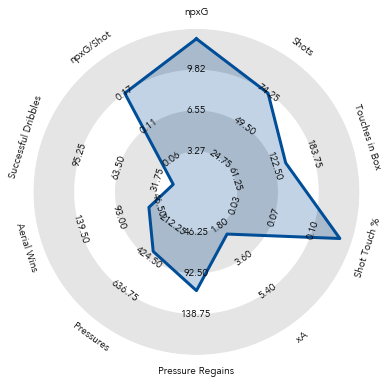

In [539]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='polar')


ax.plot(angles,vals)
ax.fill(angles,vals, alpha=0.3)
ax.bar(0,0.25,width=2*np.pi, lw=0, fc='w', alpha=0.2)
ax.bar(0,0.25,width=2*np.pi, bottom=0.25, lw=0, fc='0.5', alpha=0.2)
ax.bar(0,0.25,width=2*np.pi, bottom=0.5, lw=0, fc='w', alpha=0.2)
ax.bar(0,0.25,width=2*np.pi, bottom=0.75, lw=0, fc='0.5', alpha=0.2)

ax.set_ylim(0,1)
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_rticks([0.25,0.5,0.75,1.])
ax.set_rlabel_position(0)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_thetagrids(angles*(180/np.pi))
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.spines['polar'].set_visible(False)

for i,val in enumerate(df_max.values):
    ang = i*2*np.pi/10
    if np.pi/2 < ang < 3*np.pi/2:
        ax.annotate('{}'.format(attr[i]),(ang,1.1),ha='center',va='center',rotation=180-ang*(180/np.pi),annotation_clip=False)
        ax.annotate('{:.2f}'.format(0.75*val),(ang,0.75),ha='center',va='center',rotation=180-ang*(180/np.pi))
        ax.annotate('{:.2f}'.format(0.50*val),(ang,0.5),ha='center',va='center',rotation=180-ang*(180/np.pi))
        ax.annotate('{:.2f}'.format(0.25*val),(ang,0.25),ha='center',va='center',rotation=180-ang*(180/np.pi))
    else:
        ax.annotate('{}'.format(attr[i]),(ang,1.1),ha='center',va='center',rotation=-ang*(180/np.pi),annotation_clip=False)
        ax.annotate('{:.2f}'.format(0.75*val),(ang,0.75),ha='center',va='center',rotation=-ang*(180/np.pi))
        ax.annotate('{:.2f}'.format(0.50*val),(ang,0.5),ha='center',va='center',rotation=-ang*(180/np.pi))
        ax.annotate('{:.2f}'.format(0.25*val),(ang,0.25),ha='center',va='center',rotation=-ang*(180/np.pi))

plt.show()

Look at percentiles instead.

In [691]:
stats.percentileofscore(df_fw_prem['Expected: npxG'], 2)

5.2631578947368425

In [692]:
df_fw_prem_per = df_fw_prem.copy()

In [693]:
for col in cols:
    df_fw_prem_per[col] = df_fw_prem[col].apply(lambda x: stats.percentileofscore(df_fw_prem[col],x))

In [694]:
df_fw_prem_per[cols] = df_fw_prem_per[cols] * 0.01

In [695]:
df_player_per = df_fw_prem_per[(df_fw_prem_per['Player'] == 'Tammy Abraham')&
                            (df_fw_prem_per['year'] == '2019-2020')&
                            (df_fw_prem_per['League'] == 'Premier-League')]

vals = df_player_per[cols].iloc[0].to_list()
vals += vals[:1]
angles = np.linspace(0,2*np.pi,len(cols)+1)

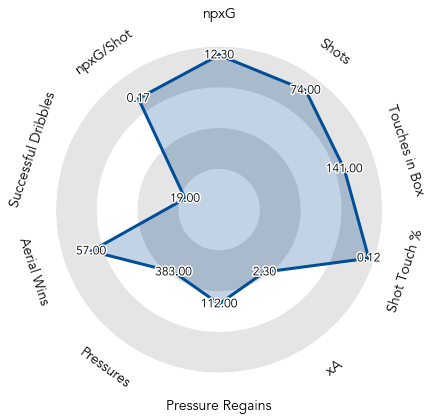

In [696]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='polar')

ax.plot(angles,vals)
ax.fill(angles,vals, alpha=0.3)
ax.bar(0,0.25,width=2*np.pi, lw=0, fc='w', alpha=0.2)
ax.bar(0,0.25,width=2*np.pi, bottom=0.25, lw=0, fc='0.5', alpha=0.2)
ax.bar(0,0.25,width=2*np.pi, bottom=0.5, lw=0, fc='w', alpha=0.2)
ax.bar(0,0.25,width=2*np.pi, bottom=0.75, lw=0, fc='0.5', alpha=0.2)

ax.set_ylim(0,1)
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_rticks([0.25,0.5,0.75,1.])
ax.set_rlabel_position(0)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_thetagrids(angles*(180/np.pi))
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.spines['polar'].set_visible(False)

for i,(per,val) in enumerate(zip(vals[:-1],df_player[cols].iloc[0].to_list())):
    ang = i*2*np.pi/10
    ax.annotate(f'{val:.2f}', (ang,per), path_effects=[PathEffects.withStroke(linewidth=3,foreground="w")],
                ha='center',va='center',fontsize=12)

for i,val in enumerate(df_max.values):
    ang = i*2*np.pi/10
    if np.pi/2 < ang < 3*np.pi/2:
        ax.annotate('{}'.format(attr[i]),(ang,1.2),ha='center',va='center',rotation=180-ang*(180/np.pi),
                    fontsize=14,annotation_clip=False)
    else:
        ax.annotate('{}'.format(attr[i]),(ang,1.2),ha='center',va='center',rotation=-ang*(180/np.pi),
                    fontsize=14,annotation_clip=False)

plt.show()

### Percentile Ranks

In [575]:
import seaborn as sns

In [600]:
import matplotlib.gridspec as grid_spec

Trying with sklearn

In [791]:
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV, LeaveOneOut, KFold

x_d = []
x_per = []
logprob = []
logprob_per = []
for i, col in enumerate(cols):
    
    x = df_fw_prem[col].values
    x_d.append(np.linspace(0, x.max(), 1000))
    x_per.append(np.linspace(0, df_player[col].iloc[0], 100))
    
    # Find best bandwidth through CV
    bandwidths = 10 ** np.linspace(-10, 10, 100)
    grid = GridSearchCV(KernelDensity(kernel='gaussian'),
                        {'bandwidth': bandwidths},
                        cv=KFold(n_splits=10))
    grid.fit(x[:, None]);
    best_bw = grid.best_params_['bandwidth']
    
    # instantiate and fit the KDE model
    kde = KernelDensity(bandwidth=best_bw, kernel='gaussian')
    kde.fit(x[:, None])

    # score_samples returns the log of the probability density
    logprob.append(kde.score_samples(x_d[i][:, None]))
    logprob_per.append(kde.score_samples(x_per[i][:, None]))

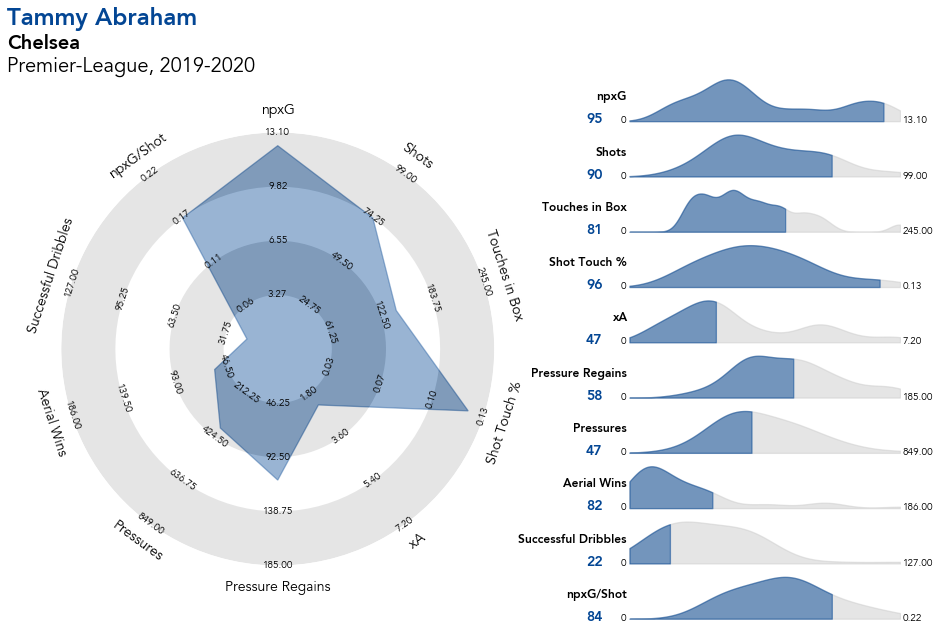

In [941]:
gs = grid_spec.GridSpec(len(cols),2, width_ratios=[2,1])
fig = plt.figure(figsize=(16,10))

colour = '#034694'

i = 0
ax_objs = []
for i, col in enumerate(cols):
    
    ax_objs.append(fig.add_subplot(gs[i:i+1, 1]))
    #ax_objs[-1] = sns.kdeplot(df_fw_prem[col].values, shade=True, lw=1, color='0.8')
    ax_objs[-1].fill_between(x_d[i], np.exp(logprob[i]), color='0.8', alpha=0.5)
    ax_objs[-1].fill_between(x_per[i], np.exp(logprob_per[i]), color=colour, alpha=0.5)
    ax_objs[-1].set_xlim(0, df_fw_prem[col].max())
    ax_objs[-1].set_yticks([])
    ax_objs[-1].set_yticklabels([])
    ax_objs[-1].set_xticks([])
    ax_objs[-1].set_xticklabels([])
    
    ax_objs[-1].text(-0.01,0,"0", transform=ax_objs[-1].transAxes, ha='right')
    ax_objs[-1].text(1.01,0,"{:.2f}".format(df_fw_prem[col].max()), transform=ax_objs[-1].transAxes, 
                     ha='left')
    
    ax_objs[-1].text(-0.01,0.5,f"{attr[i]}", transform=ax_objs[-1].transAxes, ha='right', fontweight='bold',
                    fontsize=12)
    
    ax_objs[-1].text(-0.1, 0, "{:.0f}".format(df_player_per[col].iloc[0] * 100), transform=ax_objs[-1].transAxes, 
                     ha='right', fontsize=14, fontweight='bold', color=colour)
    
    spines = ["top","right","left","bottom"]
    for s in spines:
        ax_objs[-1].spines[s].set_visible(False)
    
    i += 1

ax_rad = fig.add_subplot(gs[1:-1, 0], projection="polar")

vals = df_player_norm[cols].iloc[0].to_list()
vals += vals[:1]
angles = np.linspace(0,2*np.pi,len(cols)+1)

ax_rad.plot(angles,vals, lw=0, color=colour)
ax_rad.fill(angles,vals, alpha=0.5, color=colour)
ax_rad.bar(0,0.25,width=2*np.pi, lw=0, fc='w', alpha=0.2)
ax_rad.bar(0,0.25,width=2*np.pi, bottom=0.25, lw=0, fc='0.5', alpha=0.2)
ax_rad.bar(0,0.25,width=2*np.pi, bottom=0.5, lw=0, fc='w', alpha=0.2)
ax_rad.bar(0,0.25,width=2*np.pi, bottom=0.75, lw=0, fc='0.5', alpha=0.2)

ax_rad.set_ylim(0,1)
ax_rad.set_theta_zero_location('N')
ax_rad.set_theta_direction(-1)
ax_rad.set_rticks([0.25,0.5,0.75,1.])
ax_rad.set_rlabel_position(0)
ax_rad.set_yticklabels([])
ax_rad.set_xticklabels([])
ax_rad.set_thetagrids(angles*(180/np.pi))
ax_rad.xaxis.grid(False)
ax_rad.yaxis.grid(False)
ax_rad.spines['polar'].set_visible(False)

for i,val in enumerate(df_max.values):
    ang = i*2*np.pi/10
    if np.pi/2 < ang < 3*np.pi/2:
        ax_rad.annotate('{}'.format(attr[i]),(ang,1.1),ha='center',va='center',rotation=180-ang*(180/np.pi),
                        annotation_clip=False, fontsize=14)
        ax_rad.annotate('{:.2f}'.format(val),(ang,1.),ha='center',va='center',rotation=180-ang*(180/np.pi))
        ax_rad.annotate('{:.2f}'.format(0.75*val),(ang,0.75),ha='center',va='center',rotation=180-ang*(180/np.pi))
        ax_rad.annotate('{:.2f}'.format(0.50*val),(ang,0.5),ha='center',va='center',rotation=180-ang*(180/np.pi))
        ax_rad.annotate('{:.2f}'.format(0.25*val),(ang,0.25),ha='center',va='center',rotation=180-ang*(180/np.pi))
    else:
        ax_rad.annotate('{}'.format(attr[i]),(ang,1.1),ha='center',va='center',rotation=-ang*(180/np.pi),
                        annotation_clip=False, fontsize=14)
        ax_rad.annotate('{:.2f}'.format(val),(ang,1.),ha='center',va='center',rotation=-ang*(180/np.pi))
        ax_rad.annotate('{:.2f}'.format(0.75*val),(ang,0.75),ha='center',va='center',rotation=-ang*(180/np.pi))
        ax_rad.annotate('{:.2f}'.format(0.50*val),(ang,0.5),ha='center',va='center',rotation=-ang*(180/np.pi))
        ax_rad.annotate('{:.2f}'.format(0.25*val),(ang,0.25),ha='center',va='center',rotation=-ang*(180/np.pi))

ax_text = fig.add_subplot(gs[0, 0])
ax_text.axis('off')
ymax = max(ax_text.get_ylim())
xmax = min(ax_text.get_xlim())
htext(s='<{}>'.format(df_player['Player'].iloc[0]),x=xmax,y=2,color='k',highlight_colors=[colour],fontsize=24,
      string_weight = 'regular',highlight_weights=['bold'])
ax_text.text(0,1.5,f"{df_player['Squad'].iloc[0]}",ha='left',va='bottom',fontsize=20,
           fontweight='bold')
ax_text.text(0,1.,f"{df_player['League'].iloc[0]}, {df_player['year'].iloc[0]}",ha='left',va='bottom',fontsize=20,
           fontweight='normal')
    
#gs.update(wspace=5)        

#plt.tight_layout()
plt.show()
#fig.savefig('example_plots/player_radar.png',dpi=300,pad_inches=0.1,bbox_inches='tight')

In [1053]:
values = df_fw_prem[df_fw_prem['Player'] == 'Tammy Abraham'][cols].to_numpy()[0]

In [1054]:
values

array([1.23000000e+01, 7.40000000e+01, 1.41000000e+02, 1.22516556e-01,
       2.30000000e+00, 1.12000000e+02, 3.83000000e+02, 5.70000000e+01,
       1.90000000e+01, 1.66216216e-01])

In [1005]:
ranges = list(zip(df_fw_prem[cols].min().values,df_fw_prem[cols].max().values))

In [1057]:
ranges

[(1.5, 13.1),
 (17.0, 99.0),
 (51.0, 245.0),
 (0.02040816326530612, 0.132486388384755),
 (0.4, 7.2),
 (38.0, 185.0),
 (150.0, 849.0),
 (2.0, 186.0),
 (4.0, 127.0),
 (0.056363636363636366, 0.2222222222222222)]

In [1090]:
def draw_radar(values, ranges, colour='#034694', figax=None, alpha=0.5):
    if figax:
        fig, ax_rad = figax[0], figax[1]
    else:
        fig = plt.figure(figsize=(8,8))
        ax_rad = fig.add_subplot(111, projection='polar')
    
    vals = [values[i]/ranges[i][1] for i in range(len(ranges))]
    vals += vals[:1]
    angles = np.linspace(0,2*np.pi,len(vals))
    
    ax_rad.plot(angles, vals, lw=0, color=colour)
    ax_rad.fill(angles, vals, color=colour, alpha=alpha)
    ax_rad.bar(0,0.25,width=2*np.pi, lw=0, fc='w', alpha=0.2)
    ax_rad.bar(0,0.25,width=2*np.pi, bottom=0.25, lw=0, fc='0.5', alpha=0.2)
    ax_rad.bar(0,0.25,width=2*np.pi, bottom=0.5, lw=0, fc='w', alpha=0.2)
    ax_rad.bar(0,0.25,width=2*np.pi, bottom=0.75, lw=0, fc='0.5', alpha=0.2)
    
    ax_rad.set_ylim(0,1)
    ax_rad.set_theta_zero_location('N')
    ax_rad.set_theta_direction(-1)
    ax_rad.set_rticks([0.25,0.5,0.75,1.])
    ax_rad.set_rlabel_position(0)
    ax_rad.set_yticklabels([])
    ax_rad.set_xticklabels([])
    ax_rad.xaxis.grid(False)
    ax_rad.yaxis.grid(False)
    ax_rad.spines['polar'].set_visible(False)
    
    for i,(min_val,max_val) in enumerate(ranges):
        ang = i*2*np.pi/len(values)
        if np.pi/2 < ang < 3*np.pi/2:
            ax_rad.annotate('{}'.format(attr[i]),(ang,1.1),ha='center',va='center',rotation=180-ang*(180/np.pi),
                            annotation_clip=False, fontsize=14)
            ax_rad.annotate('{:.2f}'.format(max_val),(ang,1.),ha='center',va='center',rotation=180-ang*(180/np.pi))
            ax_rad.annotate('{:.2f}'.format(0.75*max_val),(ang,0.75),ha='center',va='center',rotation=180-ang*(180/np.pi))
            ax_rad.annotate('{:.2f}'.format(0.50*max_val),(ang,0.5),ha='center',va='center',rotation=180-ang*(180/np.pi))
            ax_rad.annotate('{:.2f}'.format(0.25*max_val),(ang,0.25),ha='center',va='center',rotation=180-ang*(180/np.pi))
        else:
            ax_rad.annotate('{}'.format(attr[i]),(ang,1.1),ha='center',va='center',rotation=-ang*(180/np.pi),
                            annotation_clip=False, fontsize=14)
            ax_rad.annotate('{:.2f}'.format(max_val),(ang,1.),ha='center',va='center',rotation=-ang*(180/np.pi))
            ax_rad.annotate('{:.2f}'.format(0.75*max_val),(ang,0.75),ha='center',va='center',rotation=-ang*(180/np.pi))
            ax_rad.annotate('{:.2f}'.format(0.50*max_val),(ang,0.5),ha='center',va='center',rotation=-ang*(180/np.pi))
            ax_rad.annotate('{:.2f}'.format(0.25*max_val),(ang,0.25),ha='center',va='center',rotation=-ang*(180/np.pi))
            
    return ax_rad

In [1105]:
def calc_distribution(values, value):
    """
    Parameters
    ---
    values : List or array of all the values over which to caluclate percentiles.
    value : Value corresponding to the individual player of interest.
    """

    x = values
    x_d = np.linspace(0, max(x), 1000)
    x_per = np.linspace(0, value, 500)

    # Find best bandwidth through CV
    bandwidths = 10 ** np.linspace(-10, 10, 100)
    grid = GridSearchCV(KernelDensity(kernel='gaussian'),{'bandwidth': bandwidths},cv=KFold(n_splits=10))
    grid.fit(x[:, None]);
    best_bw = grid.best_params_['bandwidth']

    # instantiate and fit the KDE model
    kde = KernelDensity(bandwidth=best_bw, kernel='gaussian')
    kde.fit(x[:, None])

    # score_samples returns the log of the probability density
    logprob = kde.score_samples(x_d[:, None])
    logprob_per = kde.score_samples(x_per[:, None])
        
    return x_d,x_per,logprob,logprob_per

In [1123]:
def draw_distribution(x, x_play, logprob, logprob_play, minmax, colour='#034694', figax=None):
    if figax:
        fig, ax = figax[0], figax[1]
    else:
        fig, ax = plt.subplots(figsize=(8,4))
    
    ax.fill_between(x, np.exp(logprob), color='0.8', alpha=0.5)
    ax.fill_between(x_play, np.exp(logprob_play), color=colour, alpha=0.5)
    ax.set_xlim(minmax[0], minmax[1])
    ax.set_yticks([])
    ax.set_yticklabels([])
    ax.set_xticks([])
    ax.set_xticklabels([])
    
    spines = ["top","right","left","bottom"]
    for s in spines:
        ax.spines[s].set_visible(False)
    
    return ax

In [1134]:
x = []
x_play = []
logprob = []
logprob_play = []
for i,col in enumerate(cols):
    a,b,c,d = calc_distribution(df_fw_prem[col].to_numpy(), df_player[col].iloc[0])
    x.append(a)
    x_play.append(b)
    logprob.append(c)
    logprob_play.append(d)

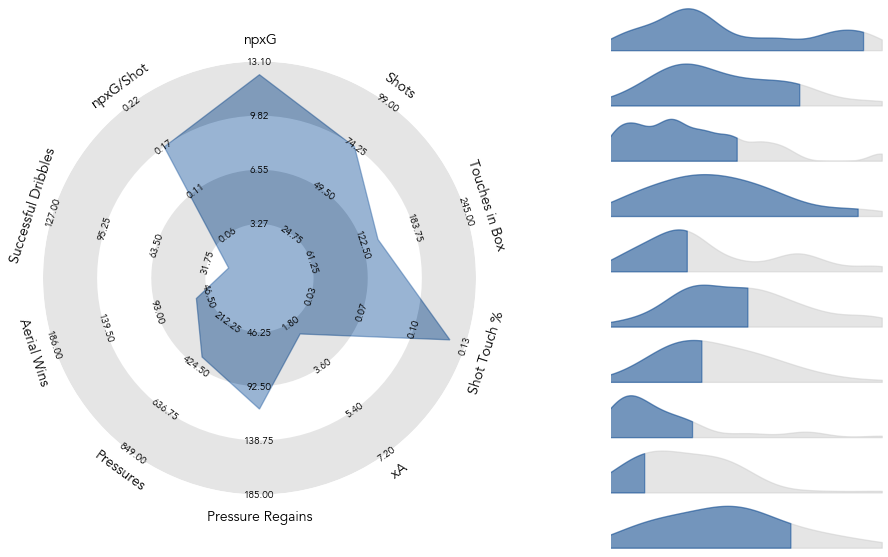

In [1136]:
gs = grid_spec.GridSpec(len(cols),2, width_ratios=[2,1])
fig = plt.figure(figsize=(16,10))

colour = '#034694'

'''i = 0
ax_objs = []
for i, col in enumerate(cols):
    
    ax_objs.append(fig.add_subplot(gs[i:i+1, 1]))
    #ax_objs[-1] = sns.kdeplot(df_fw_prem[col].values, shade=True, lw=1, color='0.8')
    ax_objs[-1].fill_between(x_d[i], np.exp(logprob[i]), color='0.8', alpha=0.5)
    ax_objs[-1].fill_between(x_per[i], np.exp(logprob_per[i]), color=colour, alpha=0.5)
    ax_objs[-1].set_xlim(0, df_fw_prem[col].max())
    ax_objs[-1].set_yticks([])
    ax_objs[-1].set_yticklabels([])
    ax_objs[-1].set_xticks([])
    ax_objs[-1].set_xticklabels([])
    
    ax_objs[-1].text(-0.01,0,"0", transform=ax_objs[-1].transAxes, ha='right')
    ax_objs[-1].text(1.01,0,"{:.2f}".format(df_fw_prem[col].max()), transform=ax_objs[-1].transAxes, 
                     ha='left')
    
    ax_objs[-1].text(-0.01,0.5,f"{attr[i]}", transform=ax_objs[-1].transAxes, ha='right', fontweight='bold',
                    fontsize=12)
    
    ax_objs[-1].text(-0.1, 0, "{:.0f}".format(df_player_per[col].iloc[0] * 100), transform=ax_objs[-1].transAxes, 
                     ha='right', fontsize=14, fontweight='bold', color=colour)
    
    spines = ["top","right","left","bottom"]
    for s in spines:
        ax_objs[-1].spines[s].set_visible(False)
    
    i += 1'''

ax_objs = []
for i, col in enumerate(cols):

    ax_objs.append(fig.add_subplot(gs[i:i+1, 1]))
    ax_objs[-1] = draw_distribution(x[i],x_play[i],logprob[i],logprob_play[i],ranges[i], figax=(fig,ax_objs[-1]))


ax_rad = fig.add_subplot(gs[1:-1, 0], projection="polar")
ax_rad = draw_radar(values, ranges, figax=(fig,ax_rad))

plt.show()

## StatsBomb Style

Really good package with code can be found [here](https://github.com/Slothfulwave612/soccerplots/blob/master/soccerplots/radar_chart.py).

In [842]:
from matplotlib.patches import Polygon

(-23.0, 25.0, -23.0, 25.0)

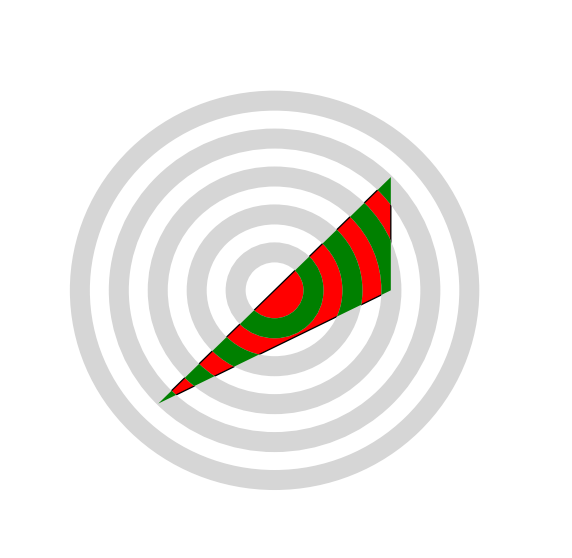

In [860]:
fig, ax = plt.subplots(figsize=(10,10))

ax.set(xlim=(-23, 25), ylim=(-23, 25))

radius = [3.35, 6.7, 10.05, 13.4, 16.75]

ec_circle, lw_circle, zorder_circle = '#D6D6D6', 20, 2

radar_color = ['r','g']

radar_1 =  Polygon(np.array([[10,10],[-10,-10],[10,0]]), fc=radar_color[0], zorder=zorder_circle-1)
ax.add_patch(radar_1)

for rad in radius:
    ## create circle
    circle_1 = plt.Circle(xy=(0, 0), radius=rad, fc='none', ec=ec_circle, lw=lw_circle, zorder=zorder_circle)
    ax.add_patch(circle_1)

    ## create another circle to fill in second color
    circle_2 = plt.Circle(xy=(0, 0), radius=rad, fc='none', ec=radar_color[1], lw=lw_circle, zorder=zorder_circle+1)
    circle_2.set_clip_path(radar_1)
    ax.add_patch(circle_2)
    
ax.axis('off')